In [15]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("data/open-powerlifting-australia.csv")
df.dtypes

Unnamed: 0            int64
Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested                 bool
Country              object
State                object
Federation          

In [17]:
df = df[df['Federation'] == 'AusPL']
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [18]:
# Widget for selecting the lift type
lift_choice = st.selectbox("Select Lift Type", ["Squat", "Bench Press", "Deadlift"])
# Mapping user-friendly choices to DataFrame column names
lift_map = {"Squat": "Best3SquatKg", "Bench Press": "Best3BenchKg", "Deadlift": "Best3DeadliftKg"}
lift_column = lift_map[lift_choice]

In [19]:
# Additional Widgets for Gender and Tested status
gender_choice = st.selectbox("Select Gender", ["M", "F"])
tested_choice = st.selectbox("Tested or Untested", ["True", "False"])

In [20]:
filtered_df = df[(df["Sex"] == gender_choice) & (df["Tested"] == (tested_choice == "True"))]

In [21]:
# Mapping user selections to column names
lift_map = {"Squat": "Best3SquatKg", "Bench Press": "Best3BenchKg", "Deadlift": "Best3DeadliftKg"}
lift_column = lift_map[lift_choice]

In [22]:
# Step 3: Filtering the data
filtered_df = df[(df["Sex"] == gender_choice) & (df["Tested"] == (tested_choice == "True"))]

In [23]:
filtered_df.head()

,Unnamed: 0,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Year
30345,2052187,Josh Griggs,M,SBD,Raw,17.0,16-17,14-18,Juniors 16-17,116.5,...,Australia,NaN,AusPL,IPL,2022-06-17,Australia,QLD,Gold Coast,Drug Tested Nationals,2022
30346,2052188,Lochlan King,M,SBD,Raw,19.0,18-19,19-23,Juniors 18-19,79.5,...,Australia,NaN,AusPL,IPL,2022-06-17,Australia,QLD,Gold Coast,Drug Tested Nationals,2022
30347,2052189,Kivah Franze,M,SBD,Raw,18.0,18-19,NaN,Juniors 18-19,79.4,...,NaN,NaN,AusPL,IPL,2022-06-17,Australia,QLD,Gold Coast,Drug Tested Nationals,2022
30348,2052190,Kade Silverthorne,M,SBD,Raw,18.0,18-19,19-23,Juniors 18-19,81.1,...,Australia,NaN,AusPL,IPL,2022-06-17,Australia,QLD,Gold Coast,Drug Tested Nationals,2022
30349,2052191,Ethan Connor,M,SBD,Raw,18.0,18-19,NaN,Juniors 18-19,81.1,...,NaN,NaN,AusPL,IPL,2022-06-17,Australia,QLD,Gold Coast,Drug Tested Nationals,2022


In [24]:
filtered_df.dtypes

Unnamed: 0                   int64
Name                        object
Sex                         object
Event                       object
Equipment                   object
Age                        float64
AgeClass                    object
BirthYearClass              object
Division                    object
BodyweightKg               float64
WeightClassKg               object
Squat1Kg                   float64
Squat2Kg                   float64
Squat3Kg                   float64
Squat4Kg                   float64
Best3SquatKg               float64
Bench1Kg                   float64
Bench2Kg                   float64
Bench3Kg                   float64
Bench4Kg                   float64
Best3BenchKg               float64
Deadlift1Kg                float64
Deadlift2Kg                float64
Deadlift3Kg                float64
Deadlift4Kg                float64
Best3DeadliftKg            float64
TotalKg                    float64
Place                       object
Dots                

<function matplotlib.pyplot.show(close=None, block=None)>

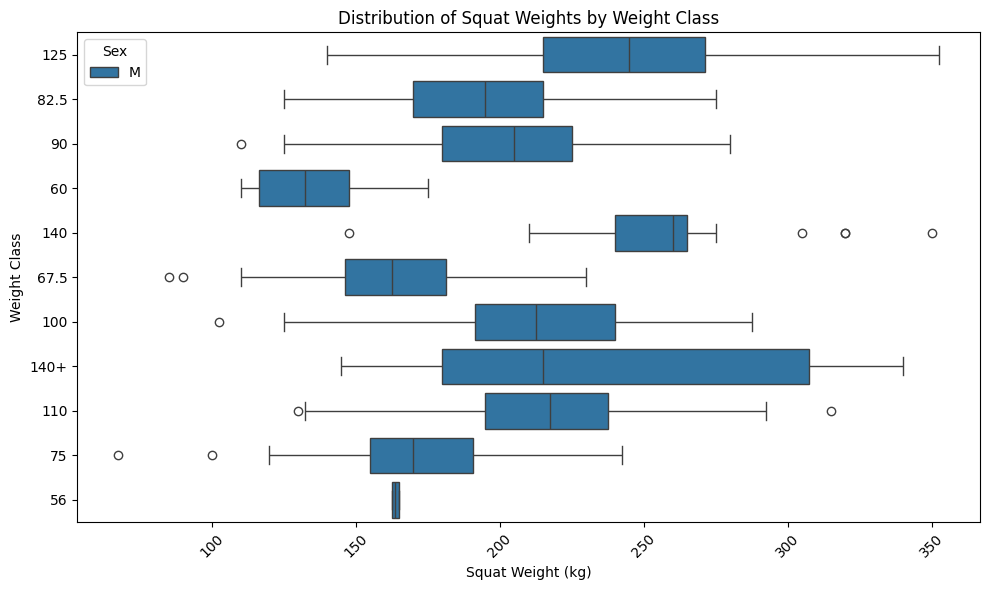

In [25]:
# Creating the box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, y='WeightClassKg', x=lift_column, hue='Sex')
plt.title(f'Distribution of {lift_choice} Weights by Weight Class')
plt.xlabel(f'{lift_choice} Weight (kg)')
plt.ylabel('Weight Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show